# 08-2 합성곱 신경망을 사용한 이미지 분류

## 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = (
    keras.datasets.fashion_mnist.load_data()
)
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

## 합성곱 신경망 만들기

In [2]:
model = keras.Sequential()
model.add(
    keras.layers.Conv2D(
        32, kernel_size=3, activation="relu", padding="same", input_shape=(28, 28, 1)
    )
)

c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

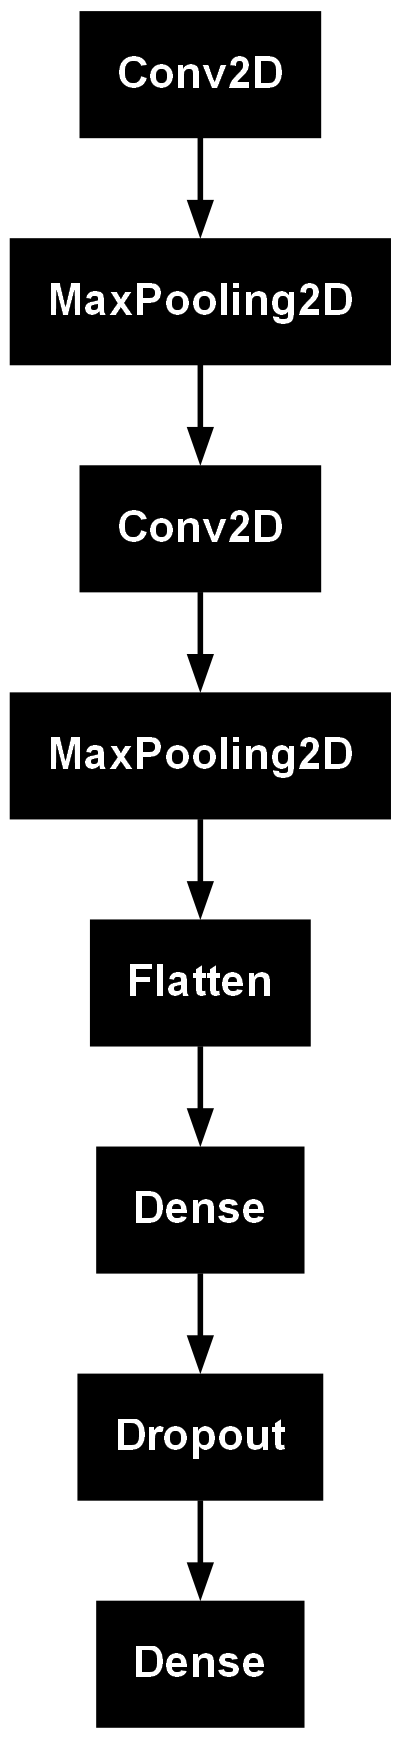

In [7]:
keras.utils.plot_model(model)

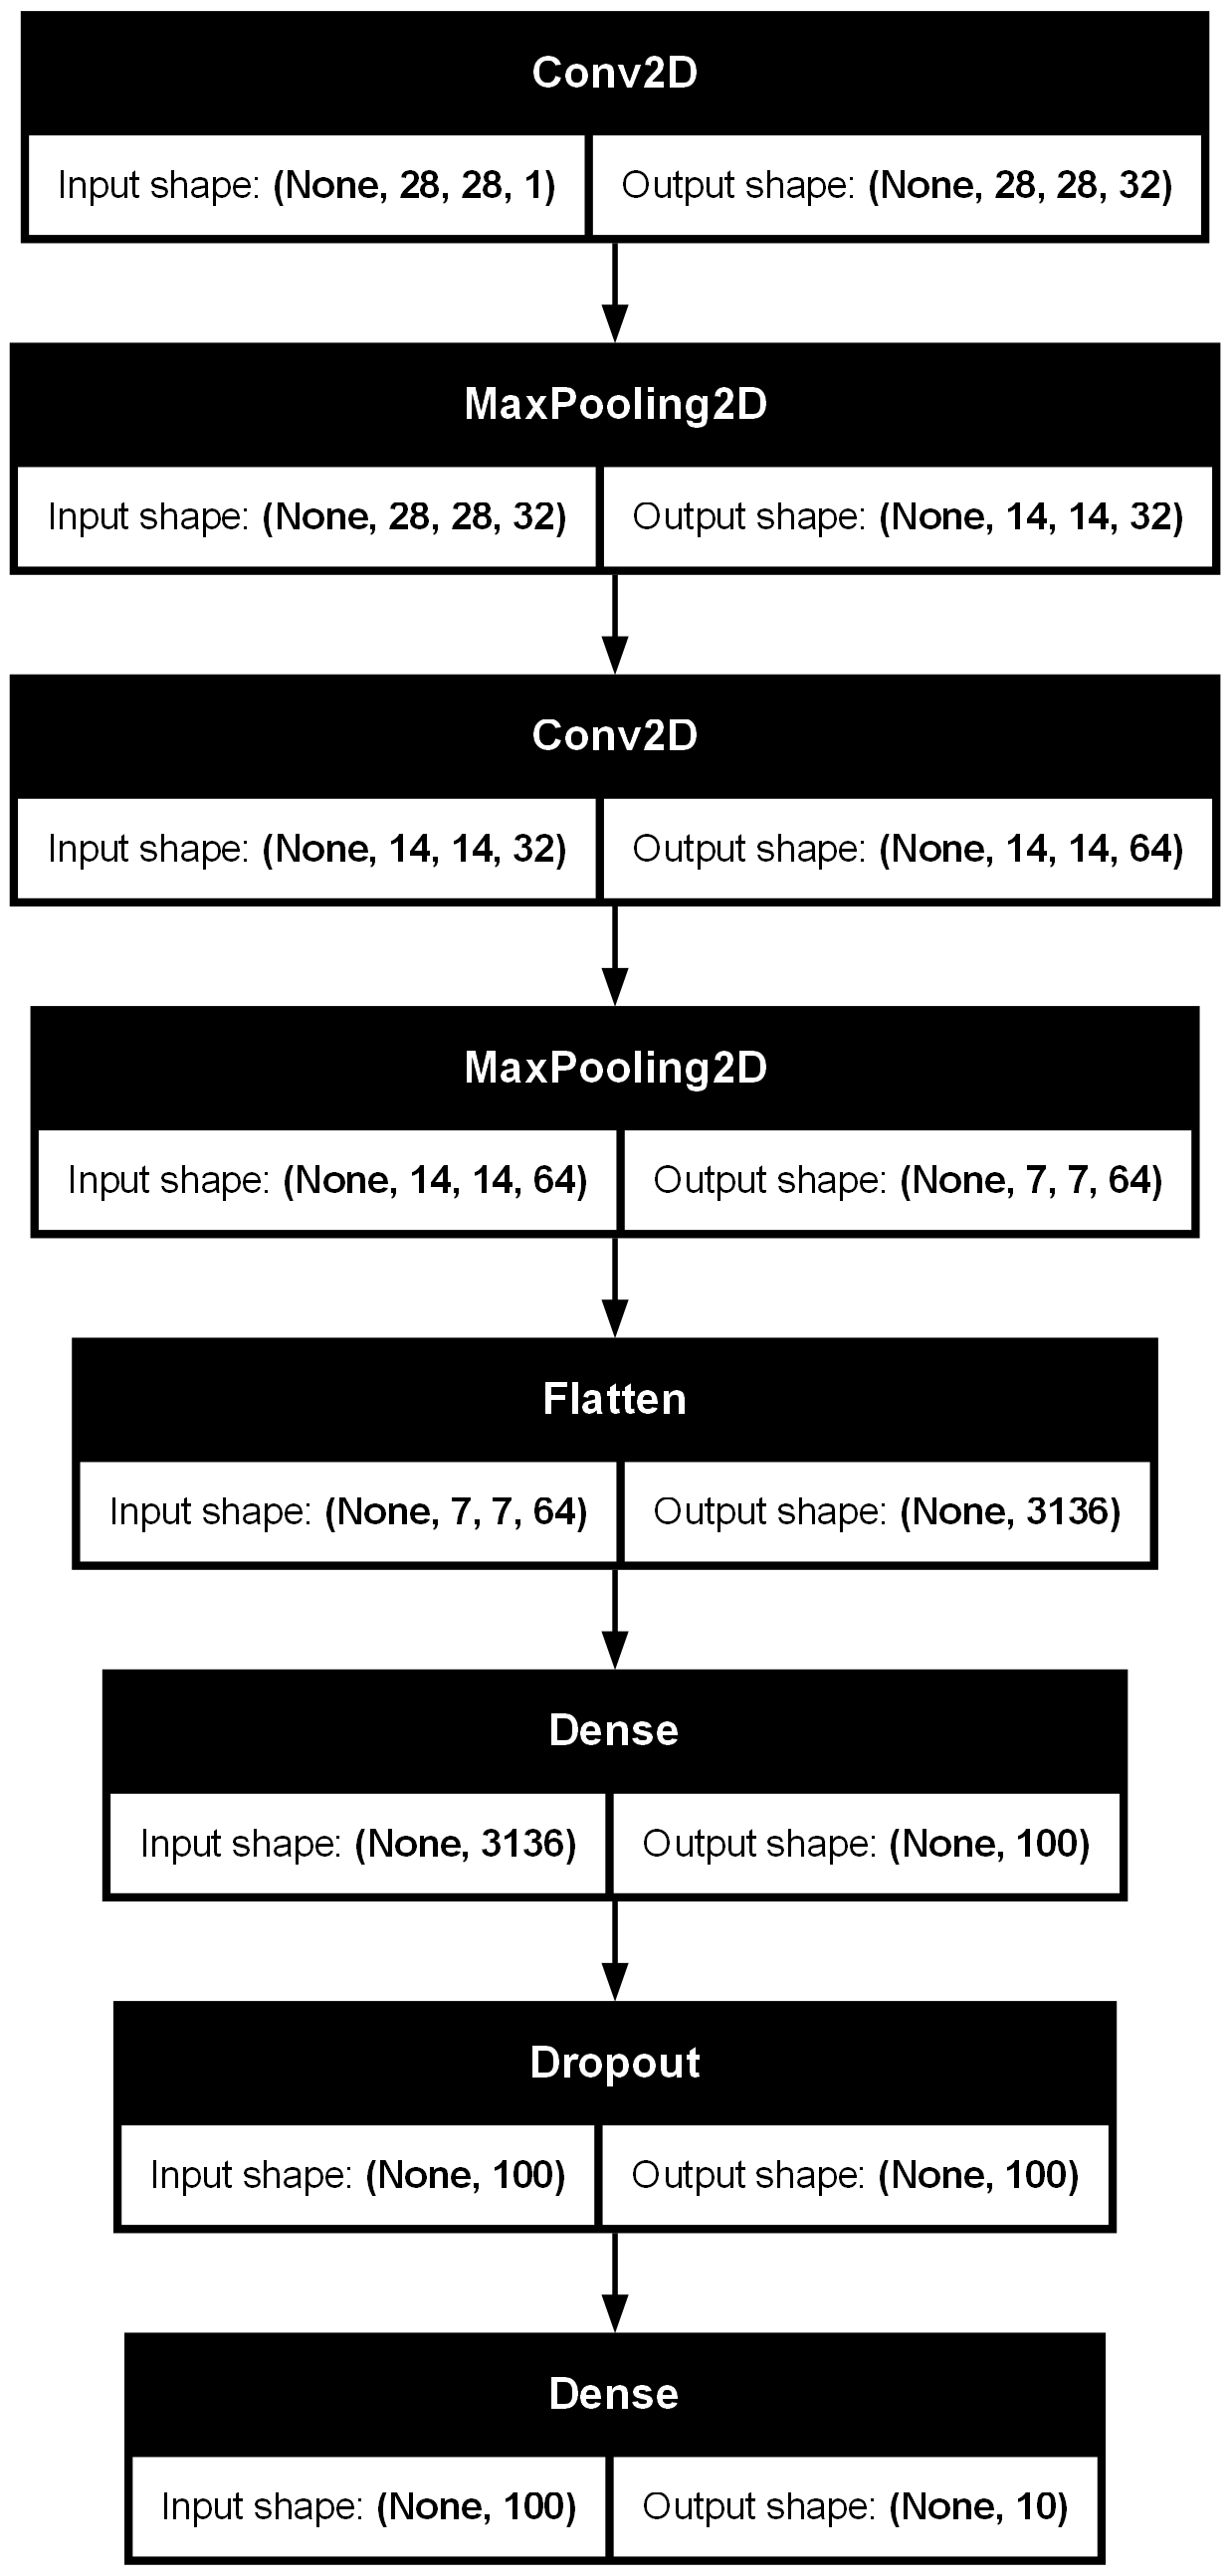

In [8]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

In [9]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best-cnn-model.keras", save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.7456 - loss: 0.7151 - val_accuracy: 0.8775 - val_loss: 0.3329
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8690 - loss: 0.3712 - val_accuracy: 0.8921 - val_loss: 0.2905
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8876 - loss: 0.3098 - val_accuracy: 0.9058 - val_loss: 0.2572
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9017 - loss: 0.2690 - val_accuracy: 0.9096 - val_loss: 0.2427
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9089 - loss: 0.2488 - val_accuracy: 0.9122 - val_loss: 0.2404
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9163 - loss: 0.2271 - val_accuracy: 0.9137 - val_loss: 0.2312
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9194 - loss: 0.2115 - val_accuracy: 0.9178 - val_loss: 0.2227
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9288 -

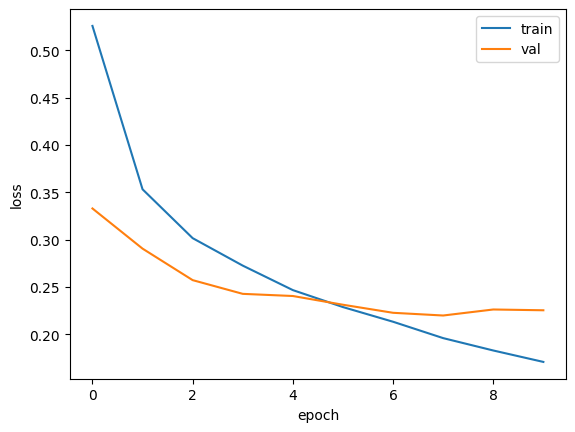

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9242 - loss: 0.2138


[0.21982045471668243, 0.9210833311080933]

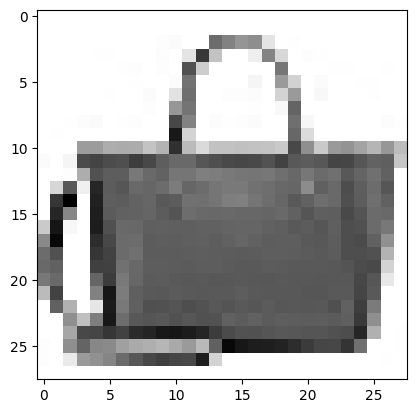

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap="gray_r")
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[2.6539508e-19 1.4655576e-24 2.3793363e-22 1.7547135e-15 2.2498047e-17
  2.9435799e-18 5.4135533e-19 4.6058466e-19 1.0000000e+00 1.7761253e-19]]


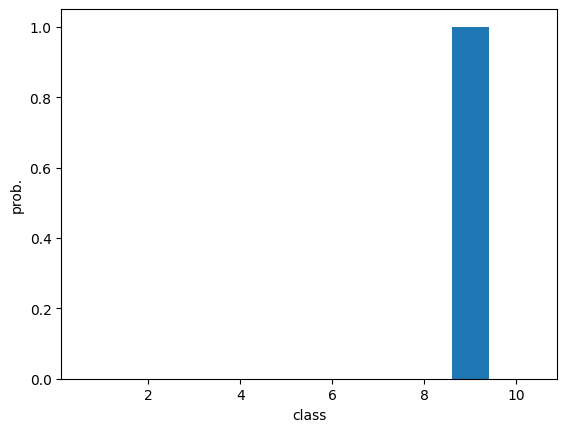

In [14]:
plt.bar(range(1, 11), preds[0])
plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

In [15]:
classes = [
    "티셔츠",
    "바지",
    "스웨터",
    "드레스",
    "코트",
    "샌달",
    "셔츠",
    "스니커즈",
    "가방",
    "앵클 부츠",
]

In [16]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [17]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9152 - loss: 0.2482


[0.24257299304008484, 0.914900004863739]